In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Functions

In [4]:
### display variances of converged params
def get_converged_params(params_exp):
    converged_alphas = [p[-1][0] for p in params_exp]
    converged_sigmas = [p[-1][1] for p in params_exp]
    converged_betas = [p[-1][2] for p in params_exp]
    return converged_alphas, converged_sigmas, converged_betas

In [5]:
def plot_evol_params_multiple_exp(params_exp, true_params, title):
    fig, ax = plt.subplots(figsize=(30, 15))
    x = np.linspace(0, len(params_exp[0]), len(params_exp[0]))
    true_alpha = true_params[0]
    true_sigma = true_params[1]
    true_beta = true_params[2]
    ax.hlines(y=true_alpha, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='green', label='true_alpha')
    ax.hlines(y=true_sigma, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='blue', label='true_sigma')
    ax.hlines(y=true_beta, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='red', label='true_beta')
    for i, list_params in enumerate(params_exp):
        alphas = [params[0] for params in list_params]
        sigmas = [params[1] for params in list_params]
        betas = [params[2] for params in list_params]
        label_1 = 'alpha' if i == 0 else None
        label_2 = 'sigma' if i == 1 else None
        label_3 = 'beta' if i == 2 else None
        ax.plot(x, alphas, color='green', label=label_1)
        ax.plot(x, sigmas, color='blue', label=label_2)
        ax.plot(x, betas, color='red', label=label_3)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=24)
    plt.title(title, fontsize=30)
    plt.show()

## 2. Experiments with data simulated with params=[alpha=0.91, sigma=1.0, beta=0.5] fpr 500 timesteps

In [6]:
path = "../experiments/1Oseeds_2"

BIS_1_path = "BIS_EM_Powell_100P_16J_500S_initparams-0.5-0.2-1.2"
#BIS_2_path = "BIS_EM_Powell_100P_16J_500S_initparams-0.75-1.2-0.3"
BIS_3_path = "BIS_EM_Powell_100P_16J_500S_initparams-0.85-1.05-0.53"

PMS_1_path = "PMS_EM_Powell_25000P_16J_500S_initparams-0.5-0.2-1.2"
#PMS_2_path = "PMS_EM_Powell_25000P_16J_500S_initparams-0.75-1.2-0.3"
PMS_3_path = "PMS_EM_Powell_25000P_16J_500S_initparams-0.85-1.05-0.53"

In [7]:
params_exp_random1, params_exp_random2, params_exp_trueinit = [], [], []
for i in range(1,11):
    path_BIS1 = os.path.join(path, "{}".format(i), BIS_1_path, "list_params.npy")
    l1 = np.load(path_BIS1)
    params_exp_random1.append(l1)
    #path_BIS2 = os.path.join(path, "{}".format(i), BIS_2_path, "list_params.npy")
    #l2 = np.load(path_BIS2)
    #params_exp_random2.append(l2)
    path_BIS3 = os.path.join(path, "{}".format(i), BIS_3_path, "list_params.npy")
    l3 = np.load(path_BIS3)
    params_exp_trueinit.append(l3)

In [8]:
pms_exp1, pms_exp2, pms_exp3 = [], [], []
for i in range(1,11):
    path_PMS1 = os.path.join(path, "{}".format(i), PMS_1_path, "list_params.npy")
    l1p = np.load(path_PMS1)
    pms_exp1.append(l1p)
    #path_PMS2 = os.path.join(path, "{}".format(i), PMS_2_path, "list_params.npy")
    #l2p = np.load(path_PMS2)
    #pms_exp2.append(l2p)
    path_PMS3 = os.path.join(path, "{}".format(i), PMS_3_path, "list_params.npy")
    l3p = np.load(path_PMS3)
    pms_exp3.append(l3p)

In [9]:
converged_alphas_BIS1, converged_sigmas_BIS1, converged_betas_BIS1 = get_converged_params(params_exp_random1)
#converged_alphas_BIS2, converged_sigmas_BIS2, converged_betas_BIS2 = get_converged_params(params_exp_random2)
converged_alphas_BIS3, converged_sigmas_BIS3, converged_betas_BIS3 = get_converged_params(params_exp_trueinit)

In [10]:
converged_alphas_PMS1, converged_sigmas_PMS1, converged_betas_PMS1 = get_converged_params(pms_exp1)
#converged_alphas_PMS2, converged_sigmas_PMS2, converged_betas_PMS2 = get_converged_params(pms_exp2)
converged_alphas_PMS3, converged_sigmas_PMS3, converged_betas_PMS3 = get_converged_params(pms_exp3)

### 2.A Mean and variance for the 10 runs for different initializations

#### initialization: alpha=0.5, sigma=0.2, beta=1.2

In [40]:
print("alphas - BIS 1: {}+/-{} ---- True alpha: 0.91".format(np.round(np.mean(converged_alphas_BIS1),3), np.var(converged_alphas_BIS1)))
print("sigmas - BIS 1: {}+/-{} ---- True sigma = 1.0".format(np.round(np.mean(converged_sigmas_BIS1),3), np.var(converged_sigmas_BIS1)))
print("betas - BIS 1: {}+/-{} -----True beta = 0.5".format(np.round(np.mean(converged_betas_BIS1),3), np.var(converged_betas_BIS1)))
print("--------------------------------------------PMS------------------------------------------------------")
print("alphas - PMS 1: {}+/-{} ---- True alpha: 0.91".format(np.round(np.mean(converged_alphas_PMS1),3), np.var(converged_alphas_PMS1)))
print("sigmas - PMS 1: {}+/-{} ---- True alpha: 1.0".format(np.round(np.mean(converged_sigmas_PMS1),3), np.var(converged_sigmas_PMS1)))
print("betas - PMS 1: {}+/-{} ---- True alpha: 0.5".format(np.round(np.mean(converged_betas_PMS1),3), np.var(converged_betas_PMS1)))

alphas - BIS 1: 0.897+/-0.0015520990382225236 ---- True alpha: 0.91
sigmas - BIS 1: 1.179+/-0.004985736154833621 ---- True sigma = 1.0
betas - BIS 1: 0.864+/-0.23275835434010173 -----True beta = 0.5
--------------------------------------------PMS------------------------------------------------------
alphas - PMS 1: 0.417+/-0.005046569772212539 ---- True alpha: 0.91
sigmas - PMS 1: 2.239+/-0.017895016800910893 ---- True alpha: 1.0
betas - PMS 1: 0.5+/-0.010241013774873105 ---- True alpha: 0.5


#### initialization: alpha=0.85, sigma=1.05, beta=0.53

In [41]:
print("alphas - BIS 3: {}+/-{} ---- True alpha: 0.91".format(np.round(np.mean(converged_alphas_BIS3),3), np.var(converged_alphas_BIS3)))
print("sigmas - BIS 3: {}+/-{} ---- True sigma=1.0".format(np.round(np.mean(converged_sigmas_BIS3),3), np.var(converged_sigmas_BIS3)))
print("betas - BIS 3: {}+/-{} ---- True beta: 0.5".format(np.round(np.mean(converged_betas_BIS3),3), np.var(converged_betas_BIS3)))
print("--------------------------------------------PMS------------------------------------------------------")
print("alphas - PMS 3: {}+/-{} ---- True alpha: 0.91".format(np.round(np.mean(converged_alphas_PMS3),3), np.var(converged_alphas_PMS3)))
print("sigmas - PMS 3: {}+/-{} ---- True sigma: 1.0 ".format(np.round(np.mean(converged_sigmas_PMS3),3), np.var(converged_sigmas_PMS3)))
print("sigmas - PMS 3: {}+/-{} ---- True beta: 0.5".format(np.round(np.mean(converged_betas_PMS3),3), np.var(converged_betas_PMS3)))

alphas - BIS 3: 0.855+/-0.0013849149189060057 ---- True alpha: 0.91
sigmas - BIS 3: 1.215+/-0.0058848986385398126 ---- True sigma=1.0
betas - BIS 3: 0.479+/-0.004559469231286074 ---- True beta: 0.5
--------------------------------------------PMS------------------------------------------------------
alphas - PMS 3: 0.41+/-0.0021240819073836564 ---- True alpha: 0.91
sigmas - PMS 3: 2.223+/-0.023418389436085183 ---- True sigma: 1.0 
sigmas - PMS 3: 0.503+/-0.10221868974598725 ---- True beta: 0.5


### 2.B Plots of params convergence for different initializations

In [11]:
true_params = [0.91, 1.0, 0.5]

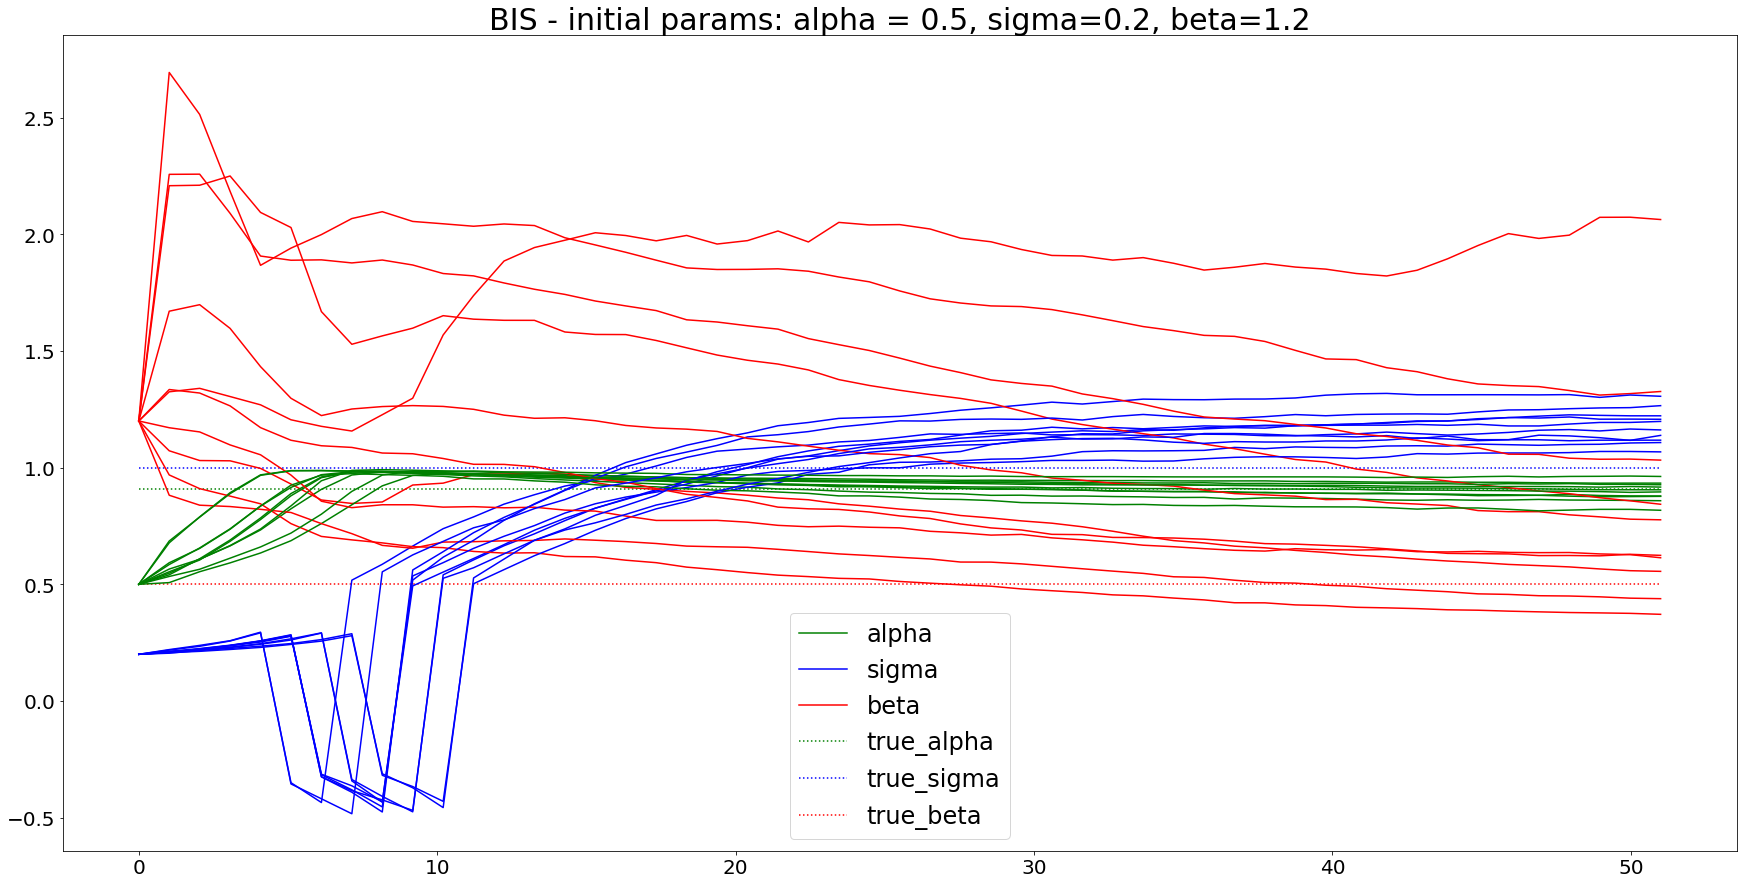

In [12]:
plot_evol_params_multiple_exp(params_exp_random1, true_params, "BIS - initial params: alpha = 0.5, sigma=0.2, beta=1.2")

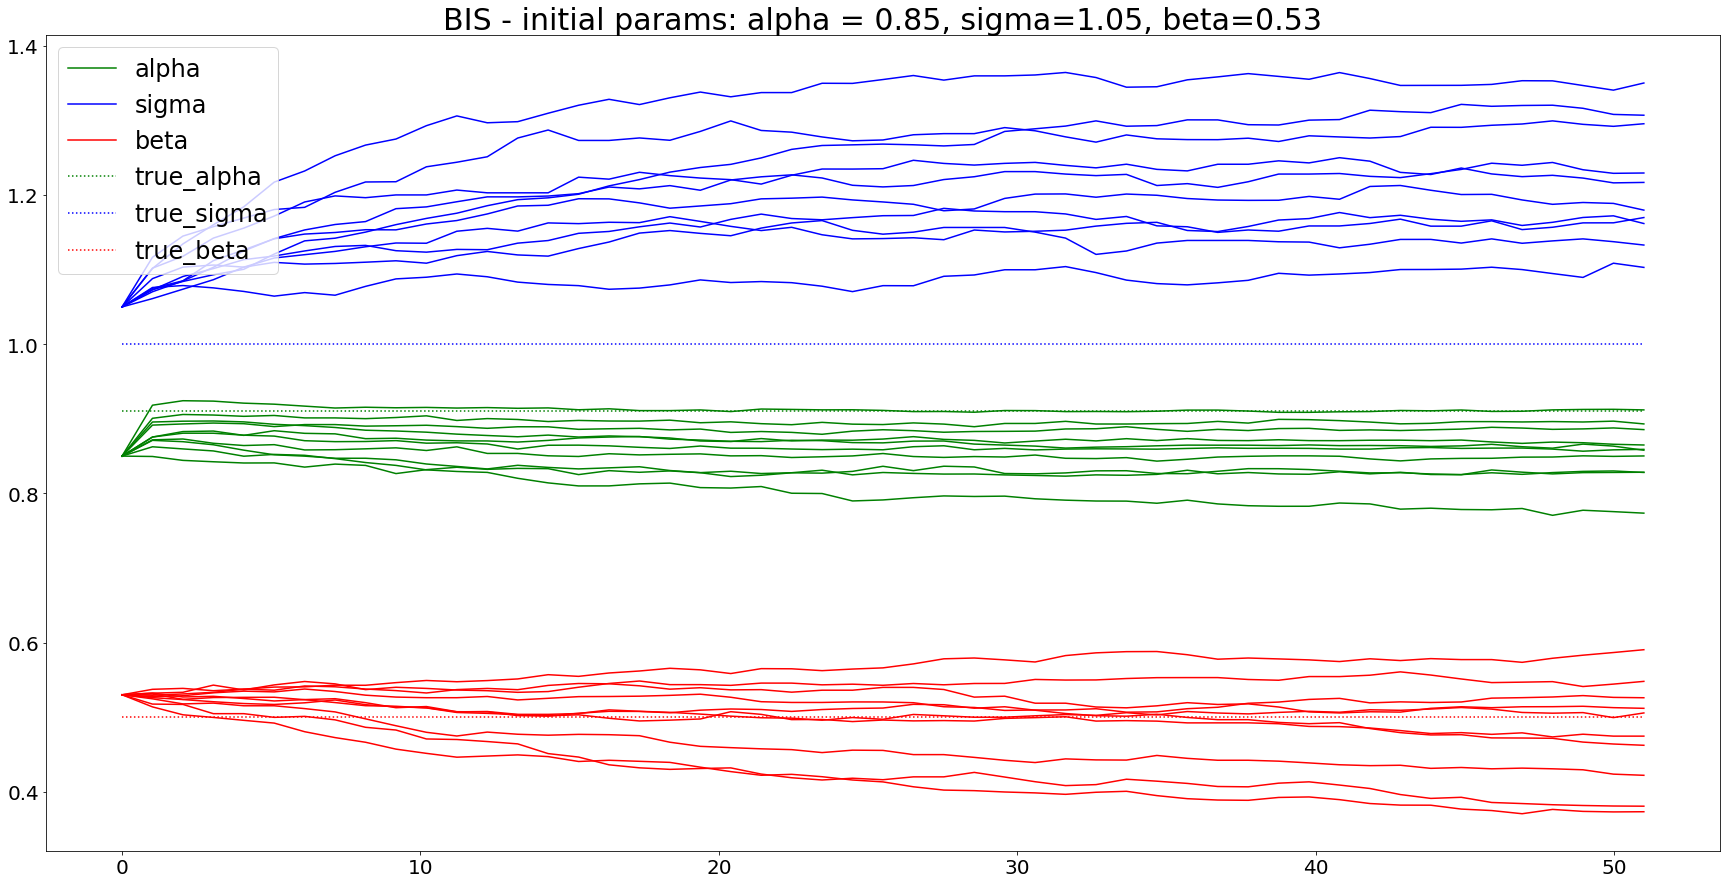

In [13]:
plot_evol_params_multiple_exp(params_exp_trueinit, true_params, "BIS - initial params: alpha = 0.85, sigma=1.05, beta=0.53")

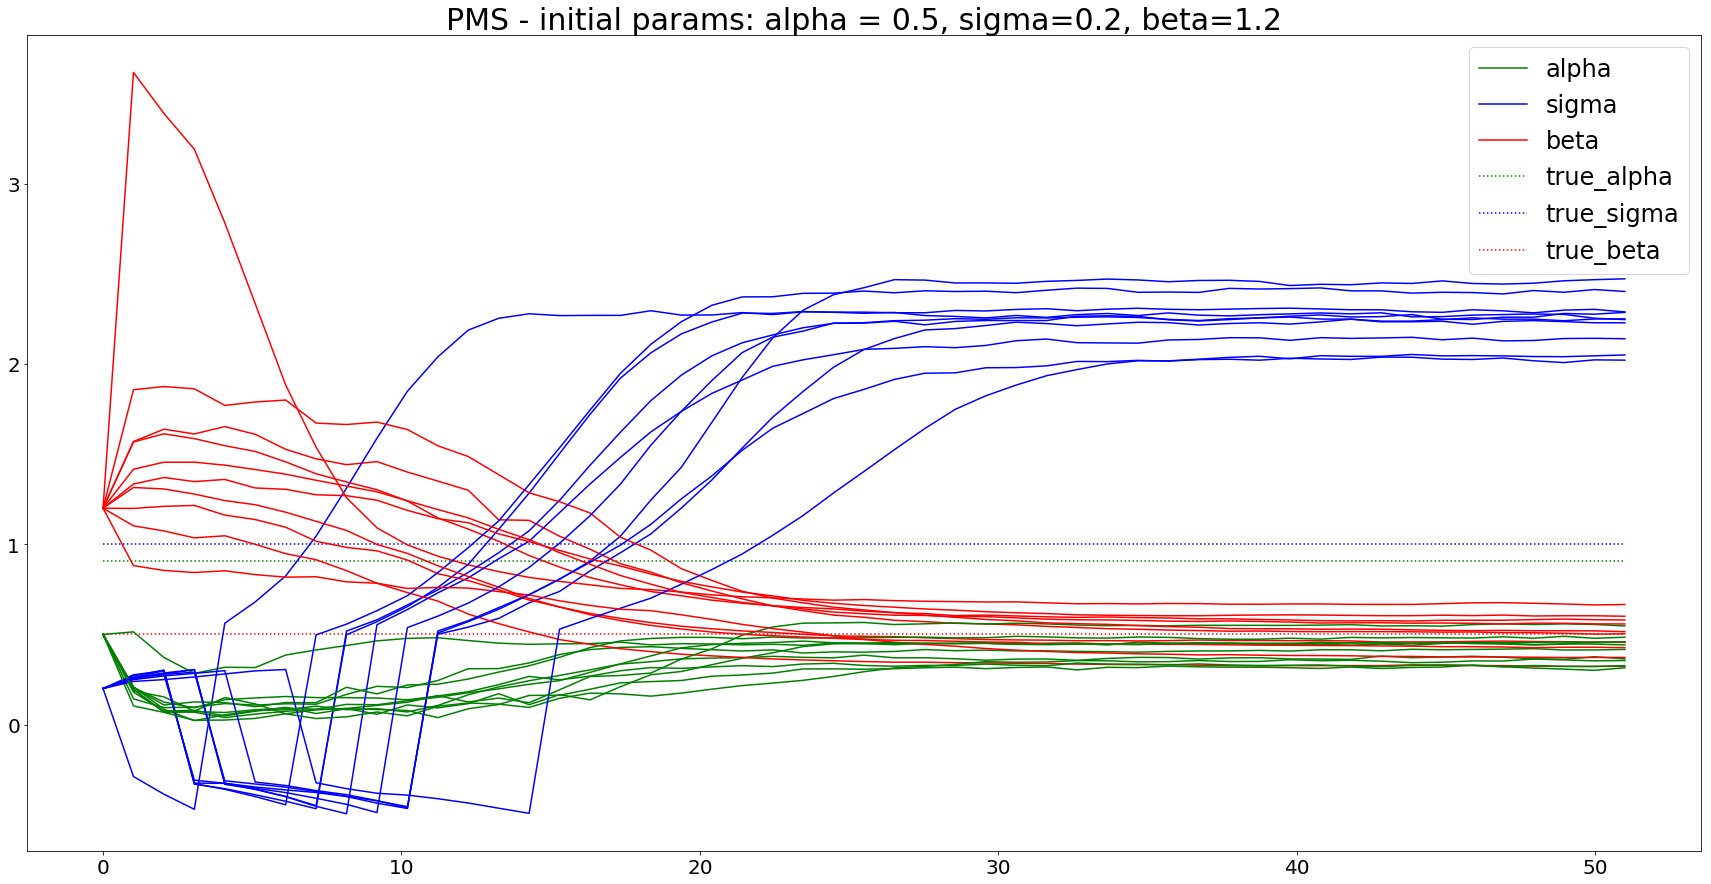

In [14]:
plot_evol_params_multiple_exp(pms_exp1, true_params, "PMS - initial params: alpha = 0.5, sigma=0.2, beta=1.2")

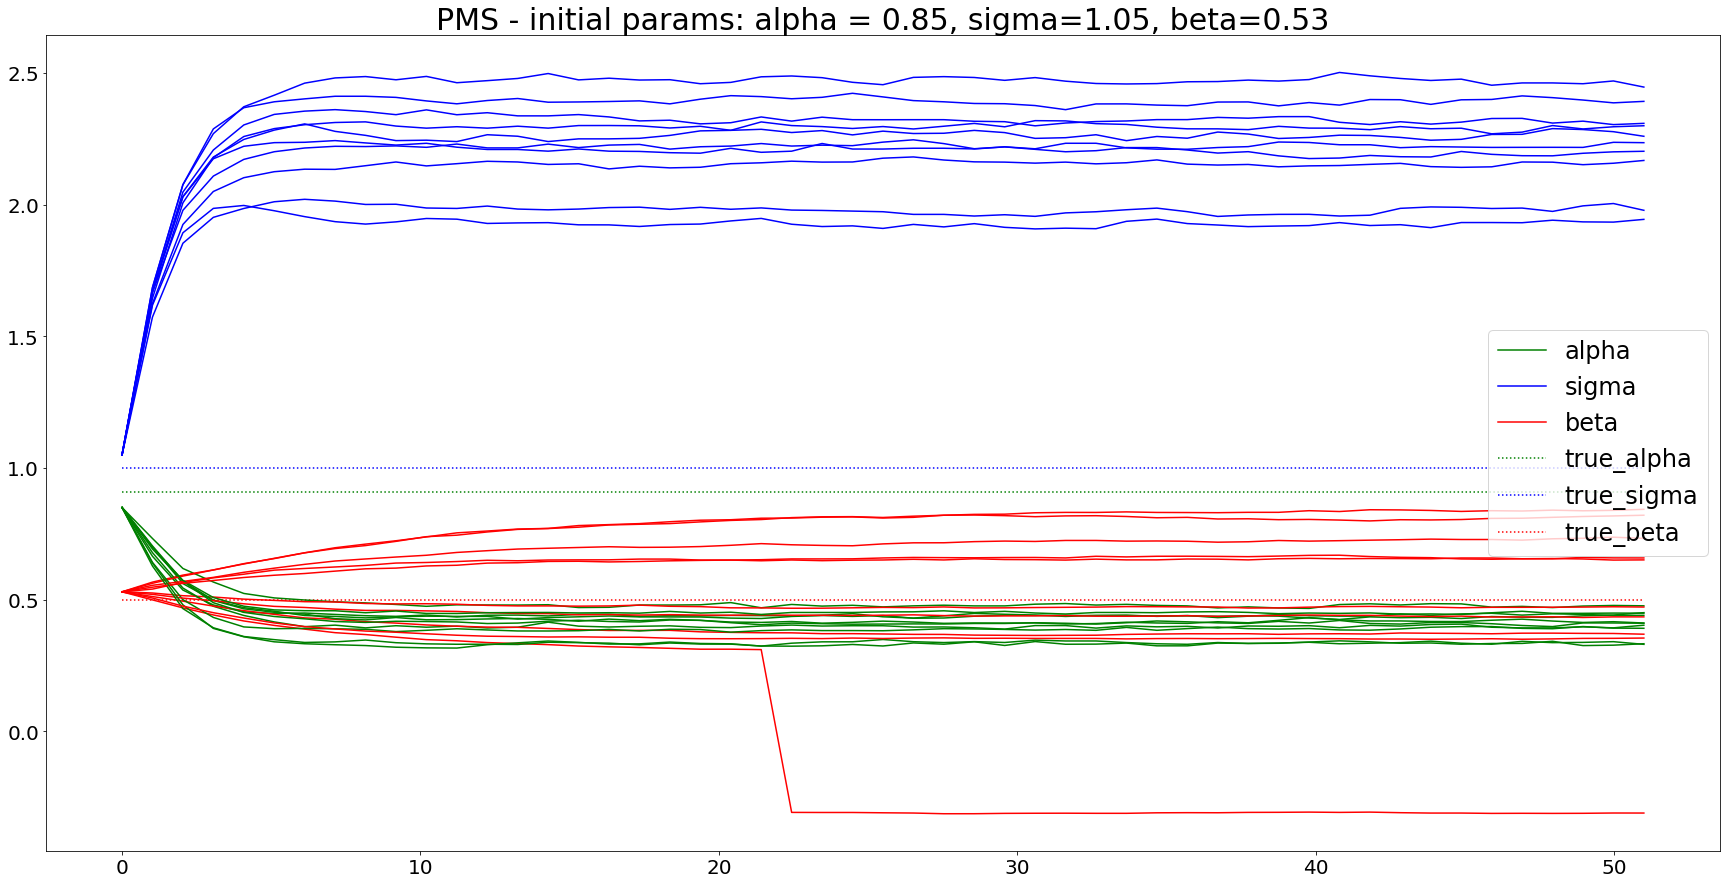

In [15]:
plot_evol_params_multiple_exp(pms_exp3, true_params, "PMS - initial params: alpha = 0.85, sigma=1.05, beta=0.53")

## 3. experiments with data simulated with params [alpha=0.8, sigma=0.1, beta=1.0] for 750 timesteps

In [24]:
path = "../experiments/1Oseeds_sigma0.1"
#experiments/1Oseeds_sigma0.1/1/BIS_EM_Powell_100P_16J_750S_initparams-0.5-0.2-1.2/list_params.npy
BIS_1_path = "BIS_EM_Powell_100P_16J_750S_initparams-0.5-0.2-1.2"
BIS_2_path = "BIS_EM_Powell_100P_16J_750S_initparams-0.75-1.2-0.3"
BIS_3_path = "BIS_EM_Powell_100P_16J_750S_initparams-0.85-0.15-0.53"

PMS_1_path = "PMS_EM_Powell_15000P_16J_750S_initparams-0.5-0.2-1.2"
PMS_2_path = "PMS_EM_Powell_15000P_16J_750S_initparams-0.75-1.2-0.3"
PMS_3_path = "PMS_EM_Powell_15000P_16J_750S_initparams-0.85-0.15-0.53"

In [25]:
params_exp_random1, params_exp_random2, params_exp_trueinit = [], [], []
for i in range(1,11):
    if i != 5:
        path_BIS1 = os.path.join(path, "{}".format(i), BIS_1_path, "list_params.npy")
        l1 = np.load(path_BIS1)
        params_exp_random1.append(l1)
        path_BIS2 = os.path.join(path, "{}".format(i), BIS_2_path, "list_params.npy")
        l2 = np.load(path_BIS2)
        params_exp_random2.append(l2)
        path_BIS3 = os.path.join(path, "{}".format(i), BIS_3_path, "list_params.npy")
        l3 = np.load(path_BIS3)
        params_exp_trueinit.append(l3)

In [26]:
pms_exp1, pms_exp2, pms_exp3 = [], [], []
for i in range(1,11):
    path_PMS1 = os.path.join(path, "{}".format(i), PMS_1_path, "list_params.npy")
    l1p = np.load(path_PMS1)
    pms_exp1.append(l1p)
    path_PMS2 = os.path.join(path, "{}".format(i), PMS_2_path, "list_params.npy")
    l2p = np.load(path_PMS2)
    pms_exp2.append(l2p)
    path_PMS3 = os.path.join(path, "{}".format(i), PMS_3_path, "list_params.npy")
    l3p = np.load(path_PMS3)
    pms_exp3.append(l3p)

### 3.A mean and variances of params for different initializations

In [27]:
converged_alphas_BIS1, converged_sigmas_BIS1, converged_betas_BIS1 = get_converged_params(params_exp_random1)

In [28]:
converged_alphas_BIS2, converged_sigmas_BIS2, converged_betas_BIS2 = get_converged_params(params_exp_random2)

In [29]:
converged_alphas_BIS3, converged_sigmas_BIS3, converged_betas_BIS3 = get_converged_params(params_exp_trueinit)

In [30]:
converged_alphas_PMS1, converged_sigmas_PMS1, converged_betas_PMS1 = get_converged_params(pms_exp1)
converged_alphas_PMS2, converged_sigmas_PMS2, converged_betas_PMS2 = get_converged_params(pms_exp2)
converged_alphas_PMS3, converged_sigmas_PMS3, converged_betas_PMS3 = get_converged_params(pms_exp3)

#### initialization: alpha=0.5, sigma=0.2, beta=1.2

In [31]:
print("alphas - BIS 1: {}+/-{} ---- True alpha: 0.8".format(np.round(np.mean(converged_alphas_BIS1),3), np.var(converged_alphas_BIS1)))
print("sigmas - BIS 1: {}+/-{} ---- True sigma: 0.1".format(np.round(np.mean(converged_sigmas_BIS1),3), np.var(converged_sigmas_BIS1)))
print("betas - BIS 1: {}+/-{} ---- True beta: 1.0".format(np.round(np.mean(converged_betas_BIS1),3), np.var(converged_betas_BIS1)))
print("--------------------------------------------PMS------------------------------------------------------")
print("alphas - PMS 1: {}+/-{} ---- True alpha: 0.8".format(np.round(np.mean(converged_alphas_PMS1),3), np.var(converged_alphas_PMS1)))
print("sigmas - PMS 1: {}+/-{} ---- True sigma: 0.1".format(np.round(np.mean(converged_sigmas_PMS1),3), np.var(converged_sigmas_PMS1)))
print("sigmas - PMS 1: {}+/-{} ---- True beta: 1.0".format(np.round(np.mean(converged_betas_PMS1),3), np.var(converged_betas_PMS1)))

alphas - BIS 1: 0.022+/-7.033434572496566e-05 ---- True alpha: 0.8
sigmas - BIS 1: 0.199+/-7.084218918536504e-05 ---- True sigma: 0.1
betas - BIS 1: 1.004+/-0.0011475901290300431 ---- True beta: 1.0
--------------------------------------------PMS------------------------------------------------------
alphas - PMS 1: 0.001+/-1.7541616218742835e-05 ---- True alpha: 0.8
sigmas - PMS 1: 0.234+/-0.00038325982514612796 ---- True sigma: 0.1
sigmas - PMS 1: 0.988+/-0.0006669094589262524 ---- True beta: 1.0


#### initialization: alpha=0.75, sigma=1.2, beta=0.3

In [32]:
print("alphas - BIS 2: {}+/-{} ---- True alpha: 0.8".format(np.mean(converged_alphas_BIS2), np.var(converged_alphas_BIS2)))
print("sigmas - BIS 2: {}+/-{} ---- True : 0.1".format(np.mean(converged_sigmas_BIS2), np.var(converged_sigmas_BIS2)))
print("sigmas - BIS 2: {}+/-{} ---- True beta: 1.0".format(np.mean(converged_betas_BIS2), np.var(converged_betas_BIS2)))
print("--------------------------------------------PMS------------------------------------------------------")
print("alphas - PMS 2: {}+/-{} ---- True alpha: 0.8".format(np.round(np.mean(converged_alphas_PMS2),3), np.var(converged_alphas_PMS2)))
print("sigmas - PMS 2: {}+/-{}  ---- True sigma: 0.1".format(np.round(np.mean(converged_sigmas_PMS2),3), np.var(converged_sigmas_PMS2)))
print("sigmas - PMS 2: {}+/-{} ---- True beta: 1.0".format(np.round(np.mean(converged_betas_PMS2),3), np.var(converged_betas_PMS2)))

alphas - BIS 2: 0.02576599247472553+/-0.0012760413669142016 ---- True alpha: 0.8
sigmas - BIS 2: 0.47838440352589806+/-0.000963606273367099 ---- True : 0.1
sigmas - BIS 2: 0.9605779453439192+/-0.0006799007657342124 ---- True beta: 1.0
--------------------------------------------PMS------------------------------------------------------
alphas - PMS 2: -0.001+/-6.87961554713617e-05 ---- True alpha: 0.8
sigmas - PMS 2: 0.492+/-0.0008682871228771731  ---- True sigma: 0.1
sigmas - PMS 2: 0.963+/-0.000623718147025848 ---- True beta: 1.0


#### initialization: alpha=0.85, sigma=0.15, beta=0.53

In [33]:
print("alphas - BIS 3: {}+/-{}---- True alpha: 0.8".format(np.round(np.mean(converged_alphas_BIS3),3), np.var(converged_alphas_BIS3)))
print("sigmas - BIS 3: {}+/-{} ---- True sigma: 0.1".format(np.round(np.mean(converged_sigmas_BIS3),3), np.var(converged_sigmas_BIS3)))
print("betas - BIS 3: {}+/-{} ---- True beta: 1.0".format(np.round(np.mean(converged_betas_BIS3),3), np.var(converged_betas_BIS3)))
print("--------------------------------------------PMS------------------------------------------------------")
print("alphas - PMS 3: {}+/-{} ---- True alpha: 0.8".format(np.round(np.mean(converged_alphas_PMS3),3), np.var(converged_alphas_PMS3)))
print("sigmas - PMS 3: {}+/-{}  ---- True sigma: 0.1".format(np.round(np.mean(converged_sigmas_PMS3),3), np.var(converged_sigmas_PMS3)))
print("sigmas - PMS 3: {}+/-{} ---- True beta: 1.0".format(np.round(np.mean(converged_betas_PMS3),3), np.var(converged_betas_PMS3)))

alphas - BIS 3: 0.049+/-9.34015904357809e-05---- True alpha: 0.8
sigmas - BIS 3: 0.219+/-0.00011246723176699698 ---- True sigma: 0.1
betas - BIS 3: -0.986+/-0.0008983607910968667 ---- True beta: 1.0
--------------------------------------------PMS------------------------------------------------------
alphas - PMS 3: 0.0+/-2.2404664622570498e-05 ---- True alpha: 0.8
sigmas - PMS 3: 0.376+/-0.0007641814304475381  ---- True sigma: 0.1
sigmas - PMS 3: -0.177+/-0.9278665226643292 ---- True beta: 1.0


In [27]:
true_params = [0.8, 0.1, 1.0]

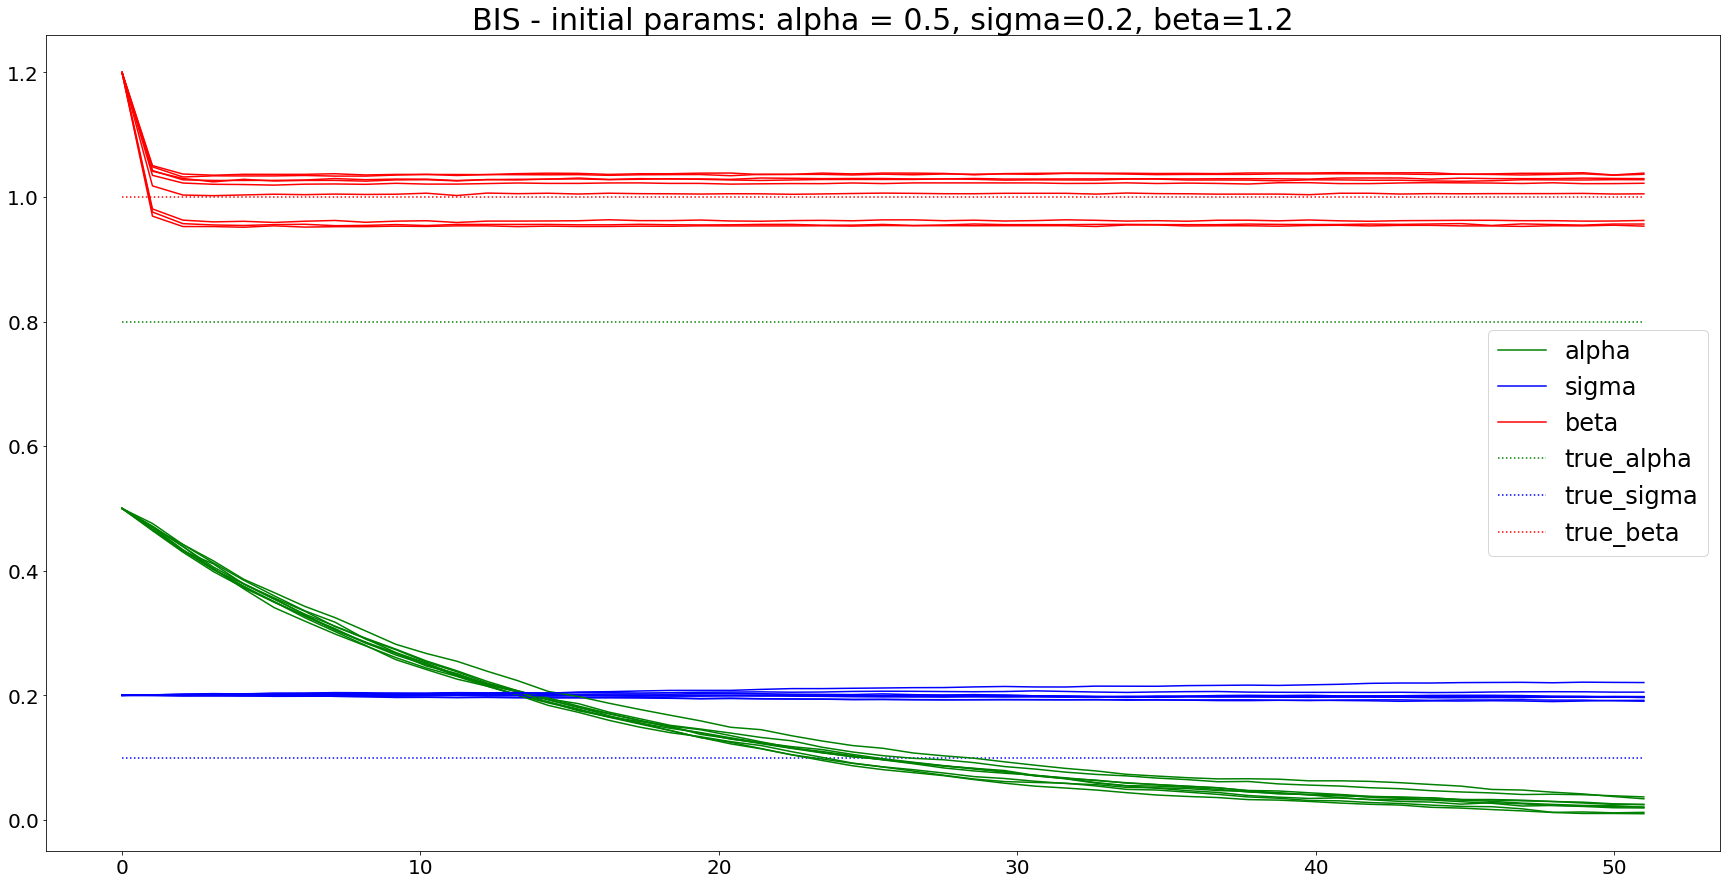

In [29]:
plot_evol_params_multiple_exp(params_exp_random1, true_params, "BIS - initial params: alpha = 0.5, sigma=0.2, beta=1.2")

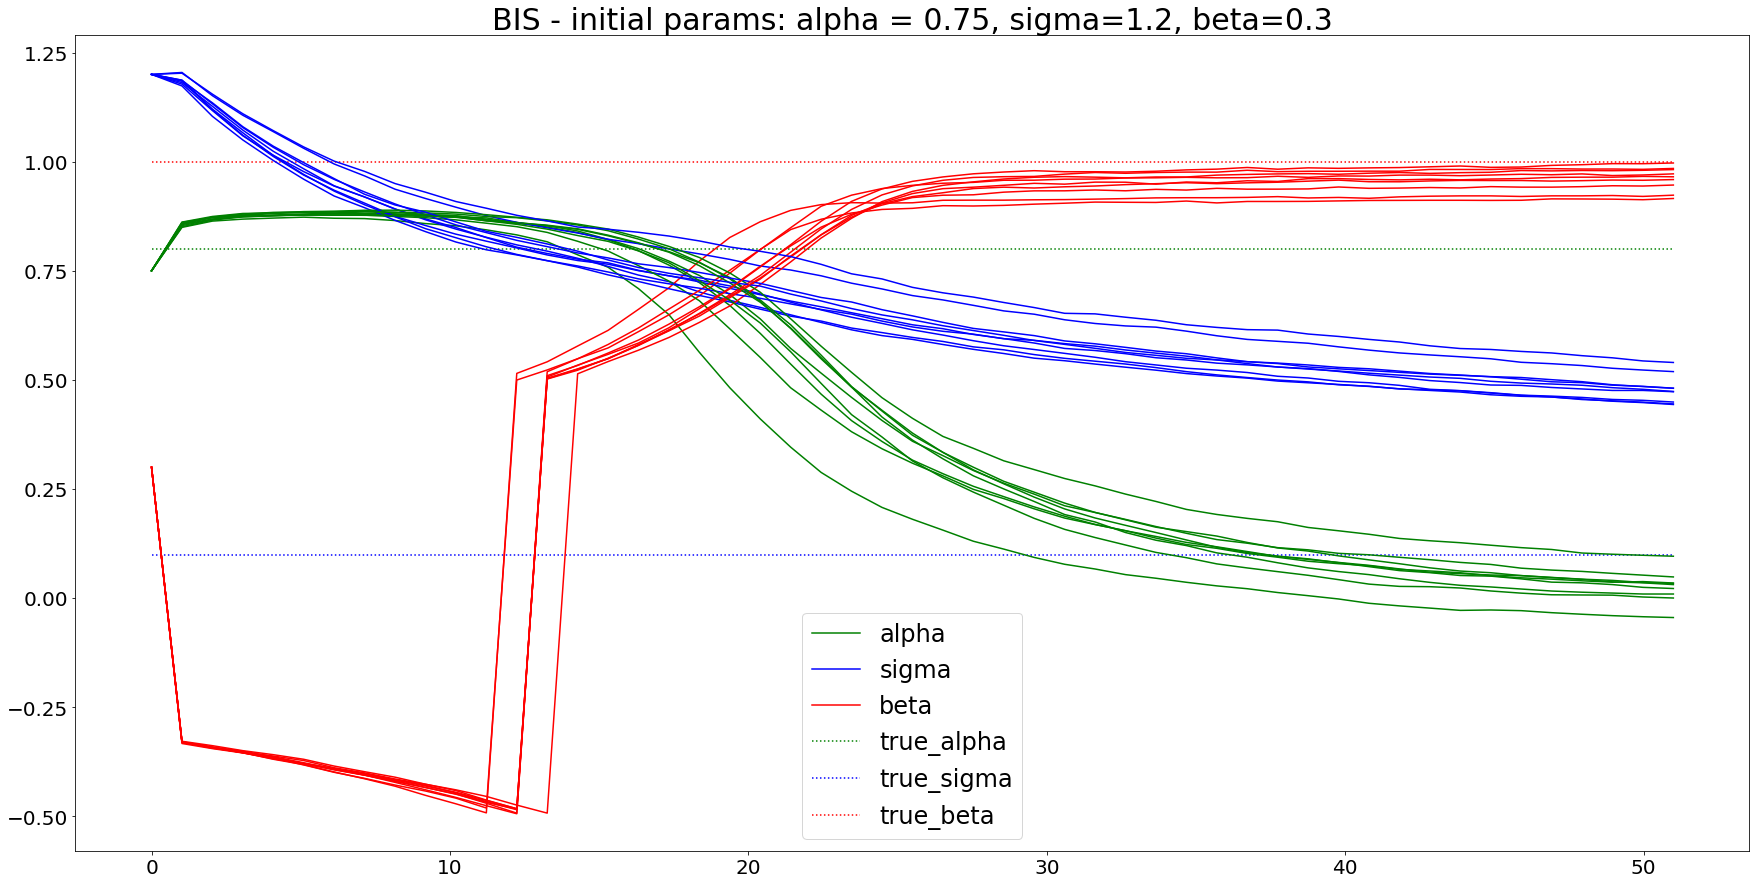

In [30]:
plot_evol_params_multiple_exp(params_exp_random2, true_params, "BIS - initial params: alpha = 0.75, sigma=1.2, beta=0.3")

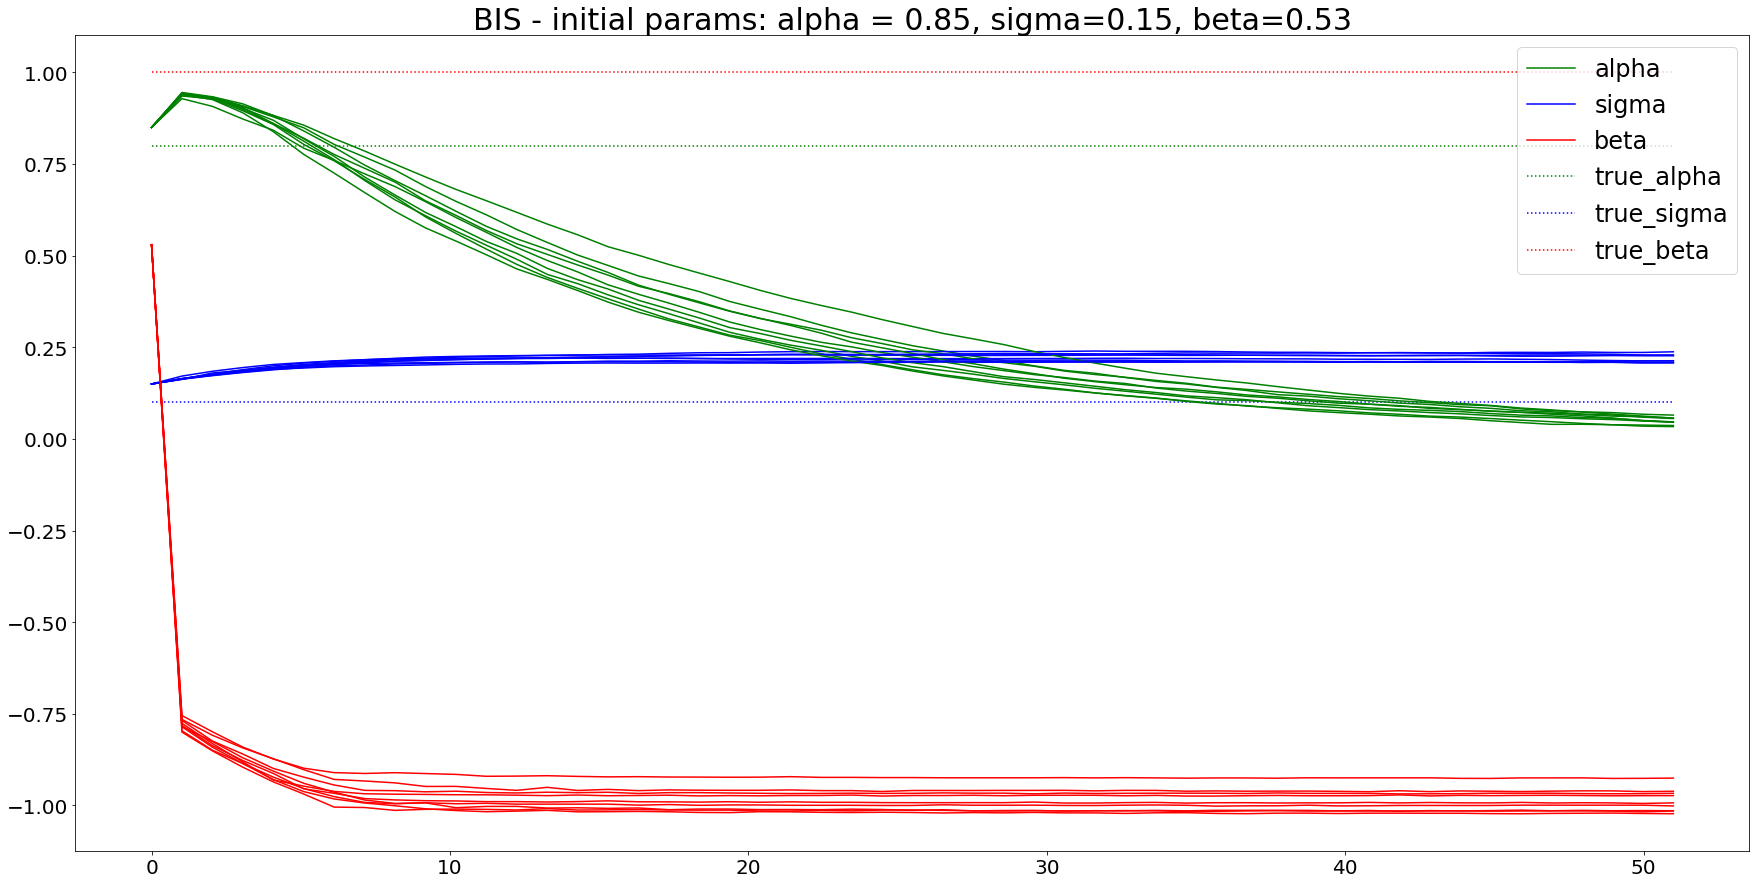

In [31]:
plot_evol_params_multiple_exp(params_exp_trueinit, true_params, "BIS - initial params: alpha = 0.85, sigma=0.15, beta=0.53")

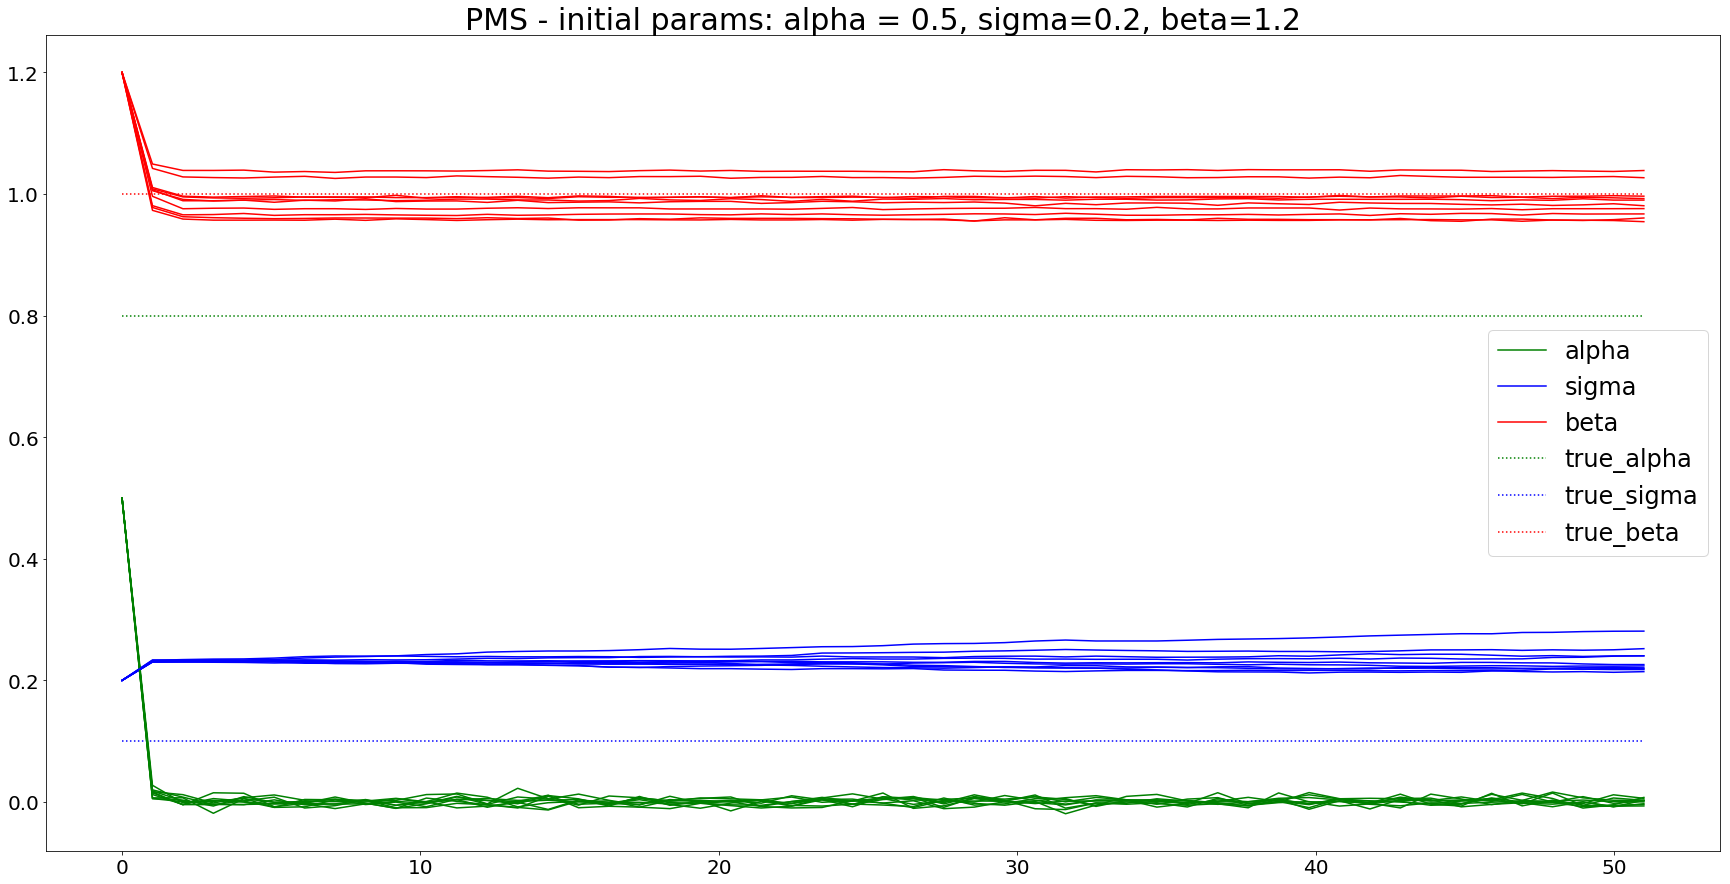

In [32]:
plot_evol_params_multiple_exp(pms_exp1, true_params, "PMS - initial params: alpha = 0.5, sigma=0.2, beta=1.2")

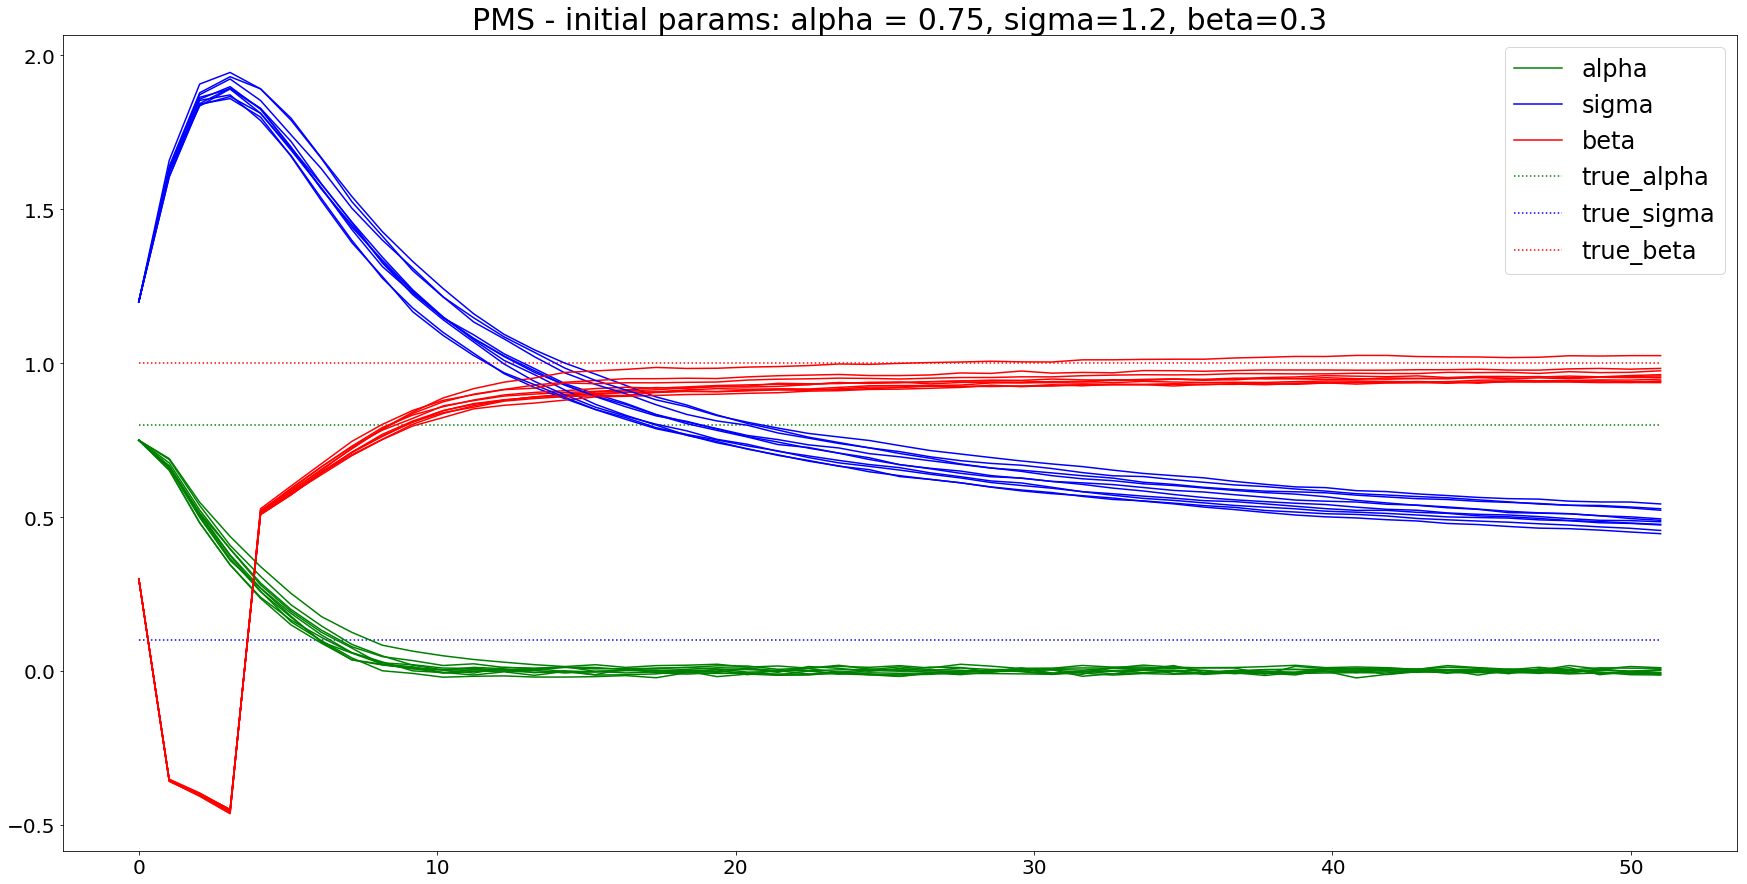

In [33]:
plot_evol_params_multiple_exp(pms_exp2, true_params, "PMS - initial params: alpha = 0.75, sigma=1.2, beta=0.3")

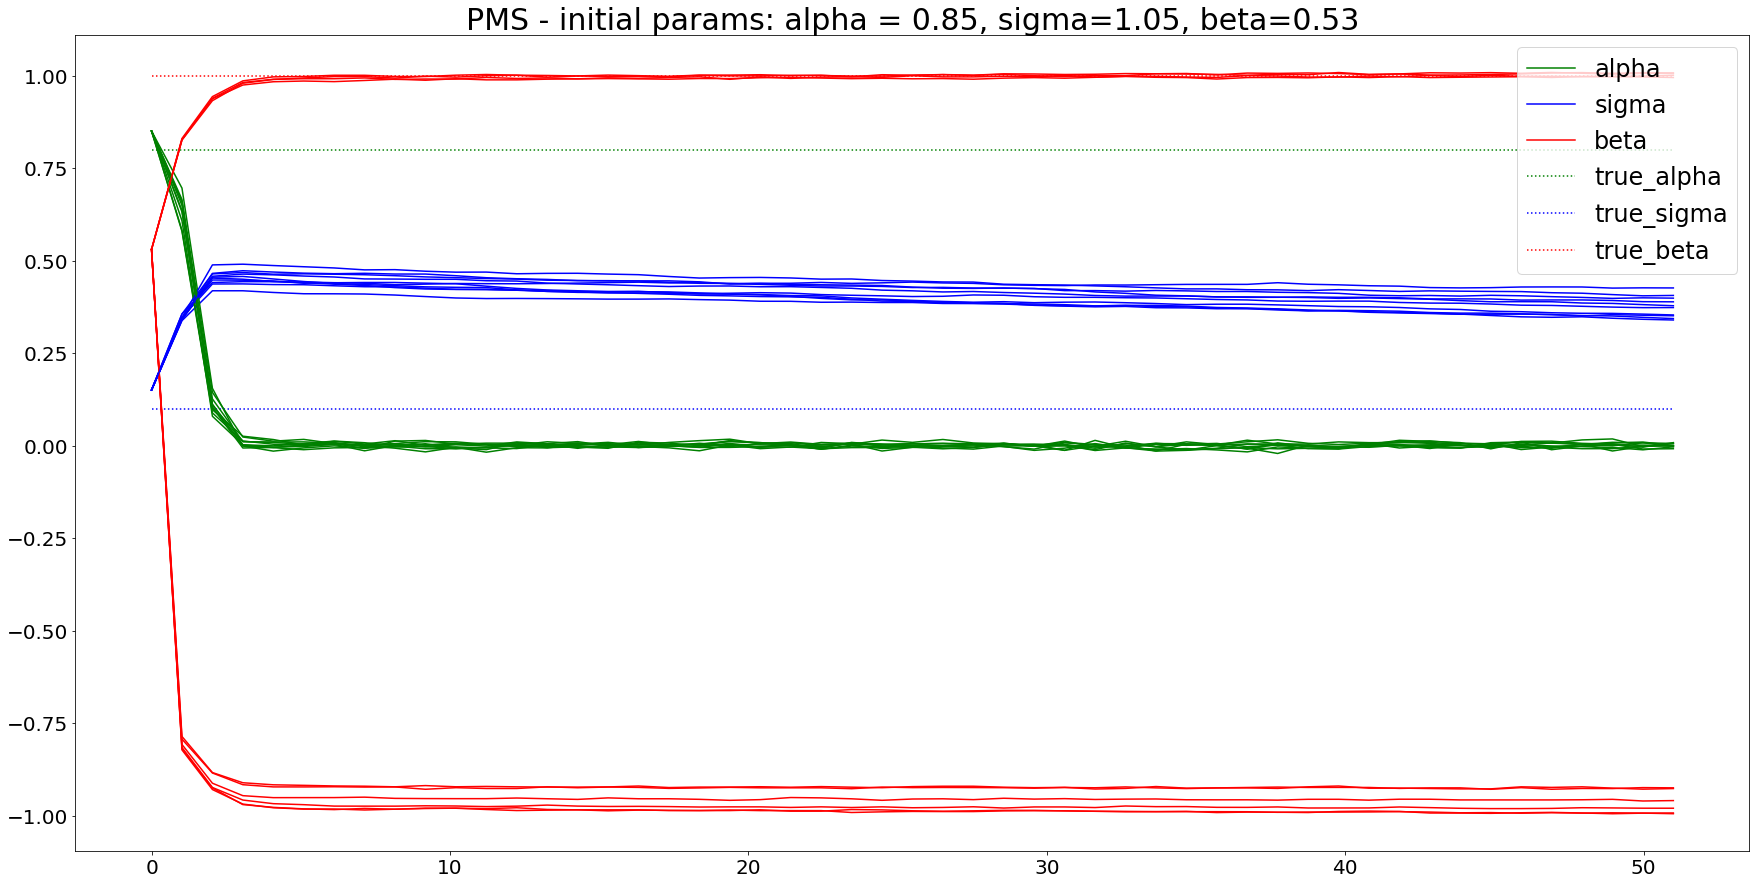

In [34]:
plot_evol_params_multiple_exp(pms_exp3, true_params, "PMS - initial params: alpha = 0.85, sigma=0.15, beta=0.53")